# Recording

A recording subsystem is provided to record live data into a HDF5 file, leaving your code free to focus on the experiment.

This example demonstrates making a recording while performing an arbitrary task:

In [1]:
import cl
import time

with cl.open() as neurons:
    recording = neurons.record()
    
    # Recording has started, simulate an arbitrary foreground task
    # (such as a game loop!)
    time.sleep(3)
    
    recording.stop()
    
attrs = recording.attributes
print(f"Recorded {attrs['duration_frames']} frames ({attrs['duration_seconds']} seconds)")
print(f"into file: {recording.file['path']}")
    

Recorded 76795 frames (3.0718 seconds)
into file: /data/recordings/2024-12-19_12-24-35.443+10-00_recording.h5


The above is great for performing arbitrary length recordings. However, if you specifically wanted a 3 second recording, you'd ask the system to automatically stop the recording after 3 seconds:

In [2]:
import cl

with cl.open() as neurons:
    recording = neurons.record(stop_after_seconds=3)
    recording.wait_until_stopped()
    
attrs = recording.attributes
print(f"Recorded {attrs['duration_frames']} frames ({attrs['duration_seconds']} seconds)")
print(f"into file: {recording.file['path']}")

Recorded 75000 frames (3.0 seconds)
into file: /data/recordings/2024-12-19_12-24-39.699+10-00_recording.h5


Or, stop after the corresponding number of frames:

In [3]:
import cl

with cl.open() as neurons:
    recording = neurons.record(stop_after_frames=neurons.get_frames_per_second() * 3)
    recording.wait_until_stopped()
    
attrs = recording.attributes
print(f"Recorded {attrs['duration_frames']} frames ({attrs['duration_seconds']} seconds)")
print(f"into file: {recording.file['path']}")

Recorded 75000 frames (3.0 seconds)
into file: /data/recordings/2024-12-19_12-24-43.808+10-00_recording.h5


## Opening a recording file

Recordings can be opened with standard PyTables and h5py HDF5 libraries, both of which are provided. Using PyTables is recommended.

Raw samples can be easily retrieved from a recording:

[[   0  -18   61 -293  194  205  -49    0   15   53  225  -18  -26 -129
  -222 -189   -1  347 -124 -169  188  266 -130   46  212  -82  475  180
  -238 -371   72 -184   95  336  -66  220   -2   55  -11  137   27  153
   -59  276 -317  110  -38 -227  119   -6  204  -83  176  348  381 -195
     0   33  204 -166  238    0  -86    0]]


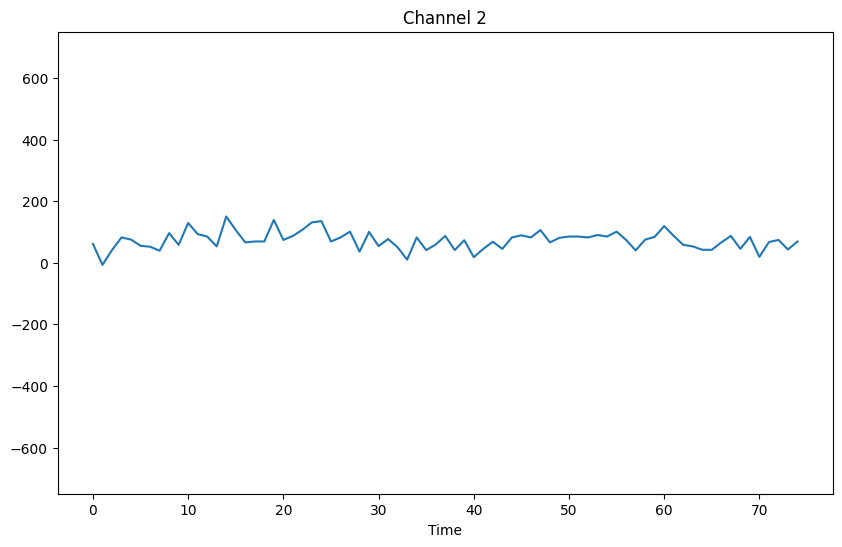

In [4]:
import cl
import tables
import matplotlib.pyplot as plt

PLOT_CHANNEL = 2
PLOT_FRAMES  = 75

with cl.open() as neurons:
    recording = neurons.record(stop_after_seconds=1)
    recording.wait_until_stopped()

# Open the recording using PyTables
h5_file = tables.open_file(recording.file['path'])

# Print the first frame
print(h5_file.root.samples[0:1])

# Plot the first PLOT_FRAMES samples of channel PLOT_CHANNEL
channel_frames = h5_file.root.samples[0:PLOT_FRAMES, PLOT_CHANNEL]

plt.figure(figsize=(10, 6))
plt.ylim(-750, 750)
plt.plot(channel_frames, label=f'Channel {PLOT_CHANNEL}')
plt.title(f'Channel {PLOT_CHANNEL}')
plt.xlabel('Time')
plt.show()

As can any recorded spikes:

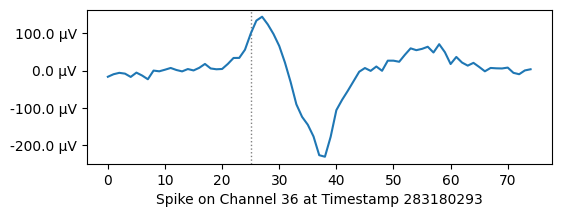

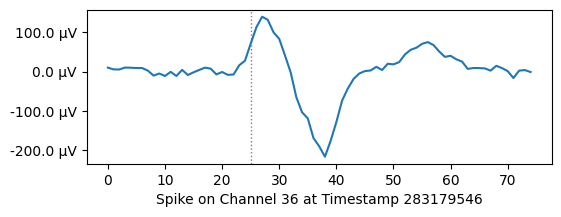

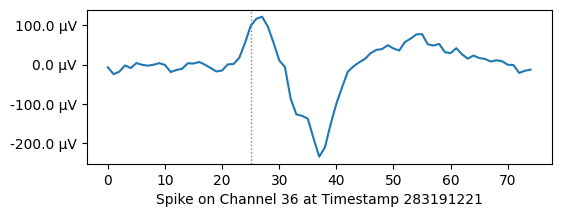

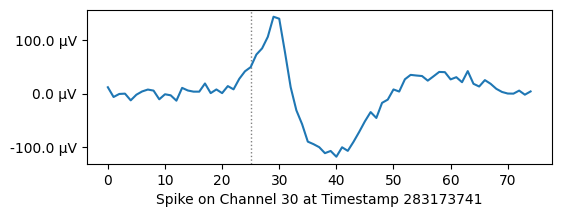

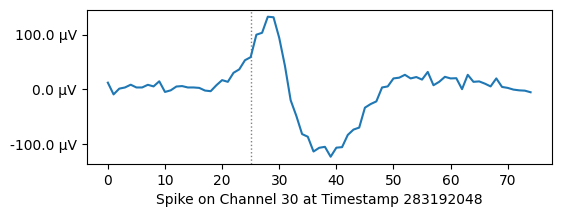

In [5]:
import cl
import tables
import matplotlib.pyplot as plt

from cl.util.plot import plot_spike

with cl.open() as neurons:
    recording = neurons.record(stop_after_seconds=1)
    recording.wait_until_stopped()

# Opent the recording using PyTables
h5_file = tables.open_file(recording.file['path'])

# Plot up to 5 largest spikes
largest_spikes = \
    sorted(
        h5_file.root.spikes[:],
        key=lambda spike: max(spike['samples']) - min(spike['samples']),
        reverse=True
        )[:5]

for spike in largest_spikes:
    plot_spike(spike)

Several useful recording options are supported:

In [6]:
import cl

with cl.open() as neurons:
    help(neurons.record)

Help on method record in module cl.neurons:

record(file_suffix=None, file_location=None, from_seconds_ago=None, from_frames_ago=None, from_timestamp=None, stop_after_seconds=None, stop_after_frames=None, attributes=None, include_spikes=True, include_stims=True, include_raw_samples=True, include_data_streams=True, exclude_data_streams=[]) method of cl.neurons.Neurons instance
    Start a new HDF5 recording.
    
    file_suffix:            The suffix to append to the filename, before the .h5 extension.
    file_location:          An absolute path to the directory where the file should be saved,
                            or relative path (relative to the default recording location).
    from_seconds_ago:       The number of seconds ago to start recording from, if possible.
    from_frames_ago:        The number of frames ago to start recording from, if possible.
    from_timestamp:         The timestamp to start recording from, if possible.
    stop_after_seconds:     The number of se

## Next

[Data Streams](CL-03.%20Data%20Streams.ipynb)